In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Define directory for train data
train_dir = "E:/Individual Projects/Deep Learning/archive/afhq/train"

In [3]:
# Define directory for validation data
validation_dir = "E:/Individual Projects/Deep Learning/archive/afhq/val"

In [4]:
# Define ImageDataGenerator for data augmentation and normalization
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images by 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Randomly zoom into images by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill mode for newly created pixels
)

In [5]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [6]:
# Define batch size
batch_size = 32

In [7]:
# Generate batches of augmented data from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=batch_size,
    class_mode='categorical'  # Use categorical labels
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [8]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 classes for your dataset
])

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/10


457/457 [==============================] - 705s 2s/step - loss: 0.8927 - accuracy: 0.5455 - val_loss: 0.5461 - val_accuracy: 0.7622
Epoch 2/10
457/457 [==============================] - 233s 510ms/step - loss: 0.5130 - accuracy: 0.7850 - val_loss: 0.2919 - val_accuracy: 0.8865
Epoch 3/10
457/457 [==============================] - 245s 535ms/step - loss: 0.3474 - accuracy: 0.8674 - val_loss: 0.1900 - val_accuracy: 0.9327
Epoch 4/10
457/457 [==============================] - 249s 545ms/step - loss: 0.2612 - accuracy: 0.9009 - val_loss: 0.1479 - val_accuracy: 0.9504
Epoch 5/10
457/457 [==============================] - 255s 558ms/step - loss: 0.2004 - accuracy: 0.9240 - val_loss: 0.1025 - val_accuracy: 0.9647
Epoch 6/10
457/457 [==============================] - 243s 530ms/step - loss: 0.1862 - accuracy: 0.9309 - val_loss: 0.0946 - val_accuracy: 0.9674
Epoch 7/10
457/457 [==============================] - 236s 517ms/step - loss: 0.1515 - accuracy: 0.9448 - val_loss: 0.0893 - 

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

47/47 [==============================] - 9s 187ms/step - loss: 0.0958 - accuracy: 0.9707
Test Loss: 0.095815509557724
Test Accuracy: 0.9706666469573975


1/1 [==============================] - 0s 263ms/step


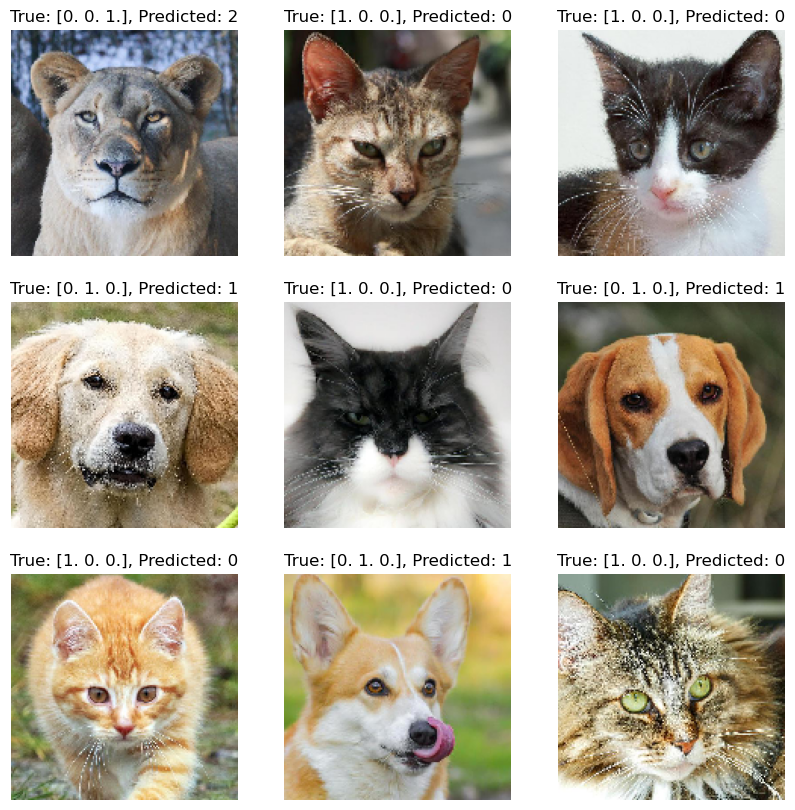

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test images and true labels
test_images_batch, true_labels_batch = next(validation_generator)

# Predict the labels for the test images
predicted_probabilities = model.predict(test_images_batch)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Define a function to plot images with true and predicted labels
def plot_test_results(images, true_labels, predicted_labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 9)):  # Plot at most 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis("off")
    plt.show()

# Plot the test results
plot_test_results(test_images_batch, true_labels_batch, predicted_labels)


In [13]:
!pip install joblib
import joblib

joblib.dump(model,"saved_model.pkl")

['saved_model.pkl']